In [1147]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# CA1 Titanic  (Classification)
- <b>How is your prediction task defined? And what is the meaning of the output variable?</b>
  - Prediction task is binary classification.
  - The output variable is the 'survived' column, it contains binary values, 0 and 1, representing death and alive respectively.



# Background Research

In [1148]:
from IPython.display import Image
Image(url= "https://media.nationalgeographic.org/assets/photos/000/273/27302.jpg")

- The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,543 passengers and crew on board, more than 1,500 lost their lives in the disaster.


- Titanic's passengers numbered approximately 1,317 people: 324 in First Class, 284 in Second Class, and 709 in Third Class. Of these, 869 (66%) were male and 447 (34%) female. There were 107 children aboard, the largest number of whom were in Third Class. The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers—833 First Class, 614 Second Class, and 1,006 Third Class


- Fares varied depending on class and season. Third Class fares from London, Southampton, or Queenstown cost £7 5s (equivalent to £700 today) while the cheapest First Class fares cost £23 (£2,300 today). The most expensive First Class suites were to have cost up to £870 in high season (£87,000 today).


- It departed for its maiden voyage from Southampton, England, on April 10, 1912. After stops in Cherbourg, France, and Queenstown (now known as Cobh), Ireland, the ship set sail for New York with 2,240 passengers and crew.


- A small coal fire was discovered during her departure from Southampton on April 10. After assessing the situation, the captain and chief engineer concluded that it was unlikely it had caused any damage that could affect the hull structure, and the stokers were ordered to continue controlling the fire at sea.


- However, according to a theory put forth by a small number of Titanic experts, the fire became uncontrollable after the ship left Southampton, forcing the crew to attempt a full-speed crossing; moving at such a fast pace, they were unable to avoid the fatal collision with the iceberg.


- Those aboard Titanic were ill-prepared for such an emergency. In accordance with accepted practices of the time, where ships were seen as largely unsinkable and lifeboats were intended to transfer passengers to nearby rescue vessels, Titanic only had enough lifeboats to carry about half of those on board; if the ship had carried her full complement of about 3,339 passengers and crew, only about a third could have been accommodated in the lifeboats. 


- The crew had not been trained adequately in carrying out an evacuation. The officers did not know how many they could safely put aboard the lifeboats and launched many of them barely half-full. Third-class passengers were largely left to fend for themselves, causing many of them to become trapped below decks as the ship filled with water. The "women and children first" protocol was generally followed when loading the lifeboats, and most of the male passengers and crew were left aboard.


- The water temperature was well below normal in the area where Titanic sank. It also contributed to the rapid death of many passengers during the sinking. Water temperature readings taken around the time of the accident were reported to be 28 °F (−2 °C). Typical water temperatures were normally around 45 °F (7 °C) during mid-April. The coldness of the water was a critical factor, often causing death within minutes for many of those in the water.

In the end, **705 people survived** the sinking of the Titanic.

# Data Importing

In [1149]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as plt
import platform
import seaborn as sns

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(plt.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.1
Matplotlib version=3.1.3
Python version=3.7.6


In [1150]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [1151]:
df = pd.read_csv("train.csv");
print(df.shape);
df[:5];

(897, 12)


In [1152]:
dftest = pd.read_csv("test.csv");
dftest[:5];


## Data Dictionary
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Exploratory Data Analysis

 ## what are needed to do
 - Describe the data
 - Find missing values
 - Quality, completeness and tideness issues
  - See if any data type is fasely assigned
 - Concluding relations between features using heatmap
  - distplot for numerical data
  - countplot for categorical data

In [1153]:
df.describe();

In [1154]:
# column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### summary on data types of train dataset 

There are 5 categorical columns:
- Survived (nominal)
- Pclass (ordinal)
- Sex (nominal)
- Embarked (nominal)
- Name (nominal)

There are 5 numerical columns:
- PassengerId
- Age
- SibSp
- Parch
- Fare

There are 2 mixture of categorical and numerical colums:
- Cabin
- Ticket

In [1155]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  897 non-null    int64  
 1   Survived     897 non-null    int64  
 2   Pclass       897 non-null    int64  
 3   Name         897 non-null    object 
 4   Sex          897 non-null    object 
 5   Age          724 non-null    float64
 6   SibSp        897 non-null    int64  
 7   Parch        897 non-null    int64  
 8   Ticket       897 non-null    object 
 9   Fare         897 non-null    float64
 10  Cabin        212 non-null    object 
 11  Embarked     895 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.2+ KB


### QUALITY AND COMPLETENESS ISSUES
1. Handle missing values
2. Sib(SIBLING) and Sp(SPOUSE) in one column.
3. Parch in one column (Par = PARENTS ; ch = CHILDREN)
4. Decide whether or not to keep Cabin.
5. Merging Sibsp and Parch into one column called 'Fam' meaning family.
6. Separate out title from name
7. Encode the 'Sex', 'Embarked' and 'Title' columns
8. Drop the 'Ticket' column
9. Drop Name after feature engineering
10. If not significant, drop PassengerId

### TIDINESS ISSUES
1. Merging Sibsp and Parch into one column called 'Fam' meaning family.
2. Pclass is in un-interpretable format
3. Separate out title from name and then drop it
4. Drop the 'Ticket' column
5. Drop Name after feature engineering
6. If not significant, drop PassengerId

## View data in graphs

### histogram on all columns

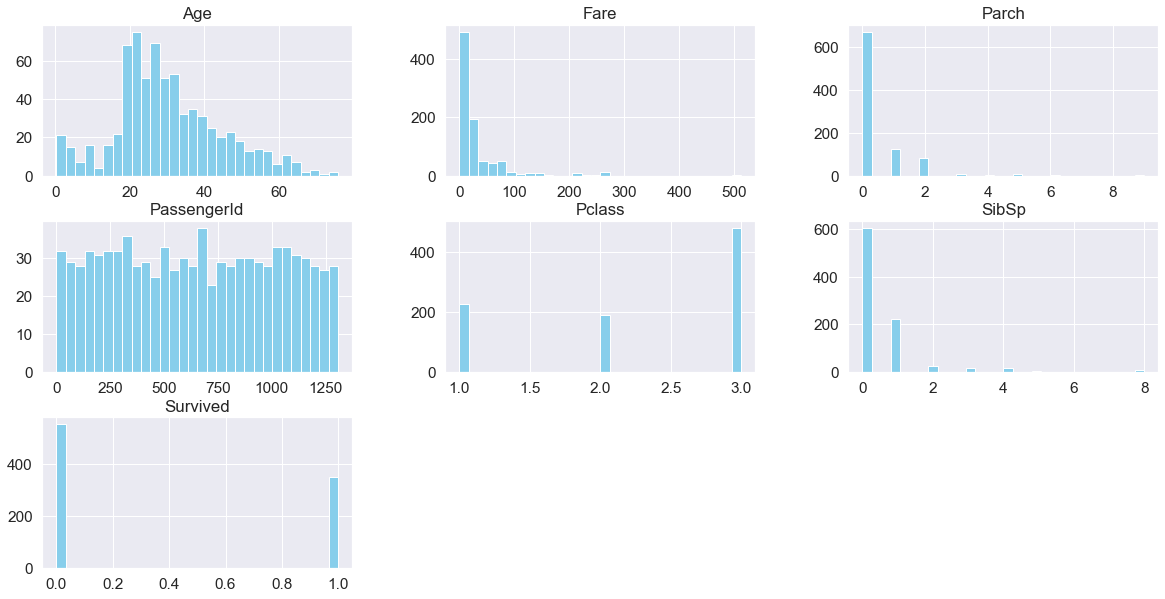

In [1156]:
#  Take a look at each columns
df.hist(figsize=(20,10), color='skyblue', bins =30);
plt.show();

- **Age** column shows most of the passengers are aged between 20 and 30.
- **Fare** column shows the fares are mostly concentrated with price close to 0, indicating that most of the passengers on Titanic were paying cheap tickets
- **Parch** column shows that most people travelled alone and a small portion of the passengers travelled with their parents or children.
- **Pclass** column shows that most of the passengers were from Pclass 3 and least of that from Pcalss 2.
- **SibSp** column shows that most of the people travelled alone and the rest travelled with their siblings or spouses.

### Histogram on 'Age'

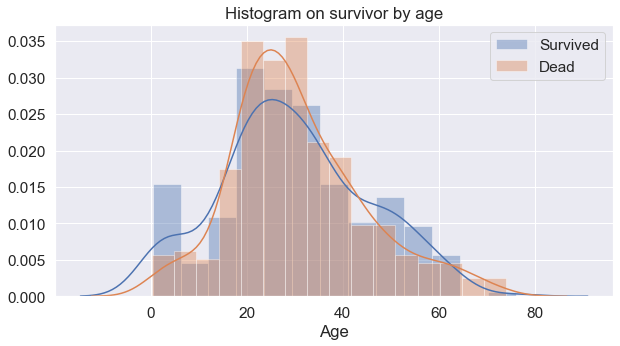

In [1157]:
#  Plot Histrogram on Age to see the variablity of survivals
plt.figure(figsize=(10,5));
sns.distplot(df[df.Survived==1]['Age'], label='Survived');
sns.distplot(df[df.Survived==0]['Age'], label='Dead');
plt.legend();
plt.title('Histogram on survivor by age');
plt.show();

- The histogram above shows the survival rate of passengers on Titanic by their age.

  - Survived rate is high near age 0 and age 20-30.

  - Death rate is high near age 20-30.

### Bar chart on 'SibSp'

<Figure size 720x360 with 0 Axes>

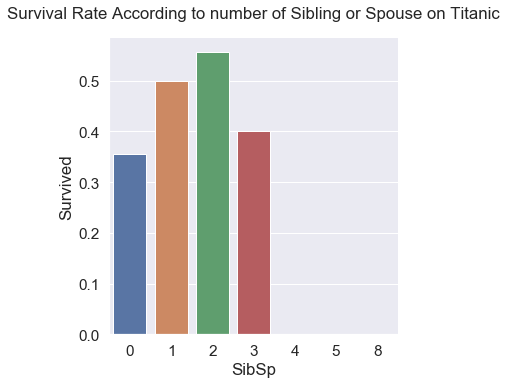

In [1158]:
#  Plot bar graph on SibSp column to see the relationship among passengers on Titanic.
plt.figure(figsize=(10,5));
sns.catplot(x="SibSp", y="Survived", data=df, kind="bar",ci=None);
plt.title('Survival Rate According to number of Sibling or Spouse on Titanic', pad=20)
plt.show();

- The bar graph  above shows the survival rate of passengers on Titanic by number of siblings or spouses with them.

  - Survival rate is highest for passengers with 2 siblings or spouses.
  - Survival rate is lowest for passengers travelled alone.

### Bar chart on 'Parch'

<Figure size 720x432 with 0 Axes>

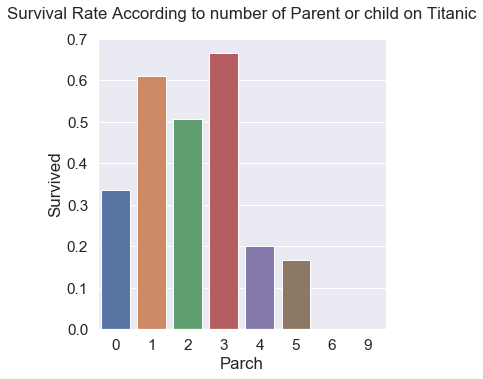

In [1159]:
#  Plot bar graph on Parch column to see the relationship among passengers.
plt.figure(figsize=(10,6))
sns.catplot(x="Parch", y="Survived", data=df, kind="bar",ci=None);
plt.title('Survival Rate According to number of Parent or child on Titanic',pad= 20)
plt.show();

- The bar graph above shows the survival rate of passengers on Titanic by number of parents or children with them.

  - Survival rate is highest for passengers who have 3 parents or child with them.
  - Survival rate is lowest for passengers who have 6 and 9 parents or child with them.

### Multi-bar chart and pie chart on 'Sex'

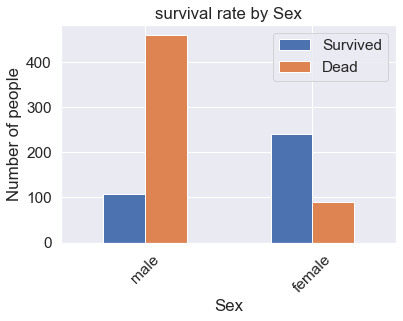

Number of male survivor: 107
Number of femmale survivor: 241


In [1160]:
#  Plot multi-bar graph on Sex column to see the number of people survived and died by their sex.
male_survive = df[df['Sex']=="male"][df['Survived']==1]
male_dead = df[df['Sex']=="male"][df['Survived']==0]
female_survive = df[df['Sex']=="female"][df['Survived']==1]
female_dead = df[df['Sex']=="female"][df['Survived']==0]

No_of_male_survived = male_survive.Survived.count();
No_of_male_dead = male_dead.Survived.count();
No_of_female_survived = female_survive.Survived.count();
No_of_female_dead = female_dead.Survived.count();

hist_survivor_rate = pd.DataFrame({'Survived':[No_of_male_survived,No_of_female_survived], 
                                   'Dead' : [No_of_male_dead,No_of_female_dead]},
                                    index=['male','female']);
hist_survivor_rate.plot.bar(rot=45);
plt.title('survival rate by Sex');
plt.xlabel('Sex');
plt.ylabel('Number of people');
plt.show();
print("Number of male survivor: {}".format(No_of_male_survived));
print("Number of femmale survivor: {}".format(No_of_female_survived));

- Multi-bar chart above shows the survival rate between male and female passengers.

  - Survival rate is higher for women on boards and lower for men on boards since there are 241 female survivors and 107 male survivors.

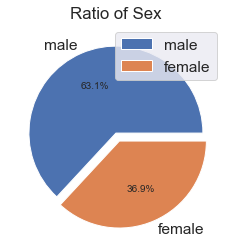

In [1161]:
#  Plot pie chart on Sex column to see the proportion of people on Titanic by their sex.
male_on_tt =  df[df['Sex']=="male"].Sex.count();
female_on_tt =  df[df['Sex']=="female"].Sex.count();

fig1, ax1 = plt.subplots();
ax1.pie([male_on_tt,female_on_tt], explode=(0,0.1),labels=['male','female'],autopct='%1.1f%%');
plt.title('Ratio of Sex');
plt.legend();
plt.show();

- This pie chart above shows there are around 26.2% more male than women on board.

### Multi-bar chart and pie chart on 'Pclass'

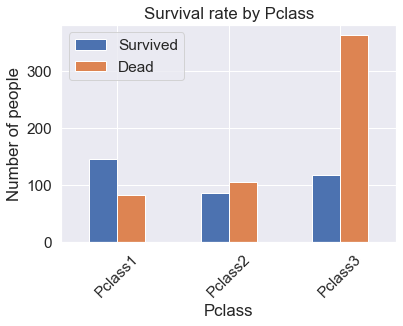

In [1162]:
#  Plot multi-bar graph on Pclass column to see the number of people survived and died by their Pclasses.
Pclass1_survive = df[df['Pclass']==1][df['Survived']==1];
Pclass1_dead = df[df['Pclass']==1][df['Survived']==0];
Pclass2_survive = df[df['Pclass']==2][df['Survived']==1];
Pclass2_dead = df[df['Pclass']==2][df['Survived']==0];
Pclass3_survive = df[df['Pclass']==3][df['Survived']==1];
Pclass3_dead = df[df['Pclass']==3][df['Survived']==0];

No_of_Pclass1_survived = Pclass1_survive.Survived.count();
No_of_Pclass1_dead = Pclass1_dead.Survived.count();
No_of_Pclass2_survive = Pclass2_survive.Survived.count();
No_of_Pclass2_dead = Pclass2_dead.Survived.count();
No_of_Pclass3_survive = Pclass3_survive.Survived.count();
No_of_Pclass3_dead = Pclass3_dead.Survived.count();

hist_survival_rate = pd.DataFrame({'Survived':[No_of_Pclass1_survived,No_of_Pclass2_survive,No_of_Pclass3_survive], 
                                   'Dead' : [No_of_Pclass1_dead,No_of_Pclass2_dead,No_of_Pclass3_dead]},
                                    index=['Pclass1','Pclass2','Pclass3']);
hist_survival_rate.plot.bar(rot=45);
plt.title('Survival rate by Pclass');
plt.xlabel('Pclass');
plt.ylabel('Number of people');
plt.show();

 - Multi-bar chart above showing the survival rate among the Pclasses.
   - Survival rate is highest for Pclass 1 passengers and lowest for Pclass3 passengers, which could probably due to more precautions measures are prepared for lower Pclass passengers and lesser of that provided for higher Pclass passengers.

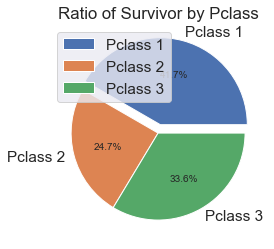

In [1163]:
#  Plot pie chart on Pclass column to see the proportion of survived passengers on Titanic by their Pclass.
pclass1_on_tt =  df[df['Pclass']==1][df['Survived']==1].Sex.count();
pclass2_on_tt =  df[df['Pclass']==2][df['Survived']==1].Sex.count();
pclass3_on_tt =  df[df['Pclass']==3][df['Survived']==1].Sex.count();

fig1, ax1 = plt.subplots();
ax1.pie([pclass1_on_tt,pclass2_on_tt,pclass3_on_tt], explode=(0.1,0,0),labels=['Pclass 1','Pclass 2','Pclass 3'],autopct='%1.1f%%');
plt.title('Ratio of Survivor by Pclass')
plt.legend(loc=2);
plt.show();

- This pie chart above shows that the passengers on board who are survived had 41.7% from Pclass 1, 24.7% from Pclass 2 and 33.6% from Pclass 3.

### Multi-bar chart and pie chart on 'Embarked'

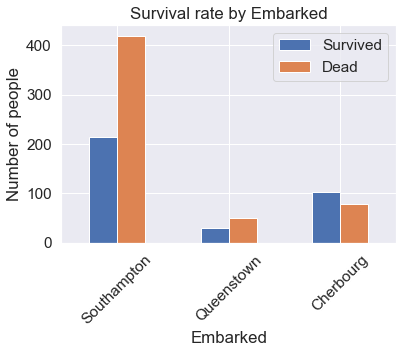

Number of survivor from Southampton: 214
Number of survivor from Queenstown: 29
Number of survivor from Cherbourg: 103


In [1164]:
#  Plot multi-bar graph on Embarked column to see the number of people survived and died.
Southampton_survive = df[df['Embarked']=='S'][df['Survived']==1];
Southampton_dead = df[df['Embarked']=='S'][df['Survived']==0];
Queenstown_survive = df[df['Embarked']=='Q'][df['Survived']==1];
Queenstown_dead = df[df['Embarked']=='Q'][df['Survived']==0];
Cherbourg_survive = df[df['Embarked']=='C'][df['Survived']==1];
Cherbourg_dead = df[df['Embarked']=='C'][df['Survived']==0];

No_of_Southampton_survive = Southampton_survive.Survived.count();
No_of_Southampton_dead = Southampton_dead.Survived.count();
No_of_Queenstown_survive = Queenstown_survive.Survived.count();
No_of_Queenstown_dead = Queenstown_dead.Survived.count();
No_of_Cherbourg_survive = Cherbourg_survive.Survived.count();
No_of_Cherbourg_dead = Cherbourg_dead.Survived.count();

hist_survival_rate = pd.DataFrame({'Survived':[No_of_Southampton_survive,No_of_Queenstown_survive,No_of_Cherbourg_survive], 
                                   'Dead' : [No_of_Southampton_dead,No_of_Queenstown_dead,No_of_Cherbourg_dead]},
                                    index=['Southampton','Queenstown','Cherbourg']);
hist_survival_rate.plot.bar(rot=45);
plt.title('Survival rate by Embarked');
plt.xlabel('Embarked');
plt.ylabel('Number of people');
plt.show();
print("Number of survivor from Southampton: {}".format(No_of_Southampton_survive));
print("Number of survivor from Queenstown: {}".format(No_of_Queenstown_survive));
print("Number of survivor from Cherbourg: {}".format(No_of_Cherbourg_survive));



- Multi-bar graph above shows the survival rate/ number of people survived or died according to Embarked.
  - Survival rate is highest for passengers on board from Southampton (England) with 214 survivors and lowest for that from Queenstown (Ireland) with 29 survivors.

  - Death rate is highest for passengers on board from Southampton (England) and lowest for that from Queenstown (Ireland).

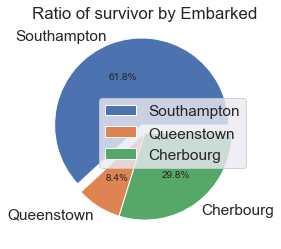

In [1165]:
#  Plot pie chart on Embarked column to see the proportion of passengers survived.
S_on_tt =  df[df['Embarked']=='S'][df['Survived']==1].Sex.count();
Q_on_tt =  df[df['Embarked']=='Q'][df['Survived']==1].Sex.count();
C_on_tt =  df[df['Embarked']=='C'][df['Survived']==1].Sex.count();

fig1, ax1 = plt.subplots();
ax1.pie([S_on_tt,Q_on_tt,C_on_tt], explode=(0.1,0,0),labels=['Southampton','Queenstown','Cherbourg'],autopct='%1.1f%%');
plt.title('Ratio of survivor by Embarked');
plt.legend(loc=5);
plt.show();

- The pie chart above shows 61.8% of the survivors aboard on Southampton, 29.8% aboard on Cherbourg and 8.4% aboard on Queenstown.

## View data in tables

### Table on 'Sex', 'Survived' and 'Pclass'

In [1166]:
pd.crosstab([df.Sex, df.Survived], df.Pclass,margins=True).style.background_gradient(cmap='YlGn')

We can see from the table above, female in Pclass 1 has the highest survival rate among all as there are only 2 ladies died. 1/3 of the males in Pcalss 1 survived. Reasons of this consequence could be Pclass 1 passengers are given more protections and privileges, and also the 'women and child' policy.

### Table on 'Embarked', 'Survived' and 'Pclass'

In [1167]:
pd.crosstab([df.Embarked, df.Survived], df.Pclass,margins=True).style.background_gradient(cmap='YlGn')

We can see from the table above, passengers aboard from Southampton has the highest number of 214 survivors and majority of Pclass 1 passengers are on board from there. Meanwhile, Pclass 3 passengers aboard from Southampton also died the most with 271 people died and only 67 people survived. 

### Table on 'SibSp', 'Survived' and 'Pclass'

In [1168]:
pd.crosstab([df.SibSp, df.Survived], df.Pclass,margins=True).style.background_gradient(cmap='YlGn')

We can see from the table above, as Pclass increses, the **death rate generally decreases with the increase for number of SibSp** onboard together. Passengers from Pclass 3 who travelled alone seems to be dead the most with a number of 255 people died and only 83 people survived. Meanwhile, passengers from Pclass 1 with 2 SibSp have survived most with 7 people and only 1 person died. However, there are some outliers, where **passengers from Pclass 3 with SibSp more than 3** seems to be all dead with no survivors at all.

### Table on 'Parch', 'Survived' and 'Pclass'

In [1169]:
pd.crosstab([df.Parch, df.Survived], df.Pclass,margins=True).style.background_gradient(cmap='YlGn')

We can see from the table above, it has similar relationship as the previous table, where **as Pclass increses, the death rate generally decreases with the increase for number of Parch** onboard together. With 285 Pclass 3 passengers died and only 84 survived. While 99 Pclass 1 passengers survived and 67 died. Hoewever, there's also outliers where **passengers with Parch on board more than 5 seems all dead with no survivors**.

## Conclusion on train data :
- Most passengers were aged between 20 and 40.


- Most of the people were travelling alone, without parents, children, siblings or spouse.


- The highest number of passengers were from Pclass 3.


 - Most people from Pclass 3 did not survive.
 
   - Since facilities were more available for 1st class passengers, they have a highest survival ratio of 41.7%.
  
  
- Ratio of survivors is higher in females than males. Might be due to the 'women and children' policy.


- More female survived(241) than males(109).
 
 
- Highest survival rate for Embarked is 'Southampton'.

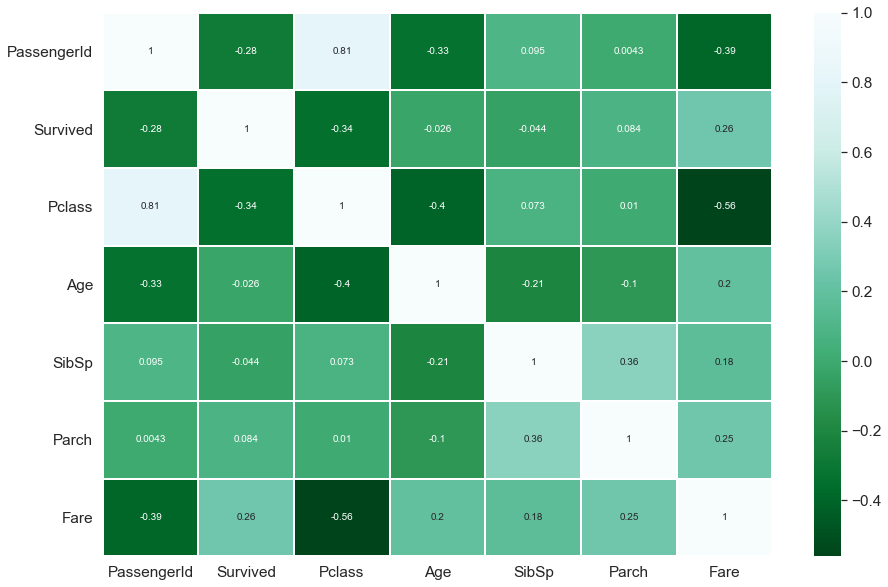

In [1170]:
#  Plot heatmap to see correlation among all columns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=1,linecolor='white', cmap="BuGn_r")
plt.show()

## Relationship analysis:

1. Pclass and Fare show strong inverse relationship. This is expected because a lower Pclass value indicates a higher Socio-economic-status (SES). So as Fare increases, numeric value of Pclass drops, and it concentrates more towards Pclass with value 1.

 
2. Pclass and Survived show strong inverse relationship. First class passengers were given higher priority during the rescure operation.


3. Survived and Fare have a moderate positive relationship. First class passengers' safety was more important than other classes, since they paid more than lower class ones.

# Data Preparation

## Data preparation for train set

### Train Fare 

Fare Feature is positively skewed. 12 quantile bins are used for this feature because they provide more information for the model to feed in. The groups at the left side of the graph have the lowest survival rate while the right side of the graph has the highest survival rate. This was not visible in the distribution plot as the data was largely skewed. There is also an unusual outlier **[26.0, 31.388]**.

In [1171]:
# keep fare column
print(df.isnull().sum());

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64


In [1172]:
from sklearn.preprocessing import LabelEncoder
df['FareBin'] = pd.qcut(df['Fare'], 12, duplicates= 'drop');

label = LabelEncoder()
df['FareBin_Code'] = label.fit_transform(df['FareBin'])
df['FareBin_Code'].unique();

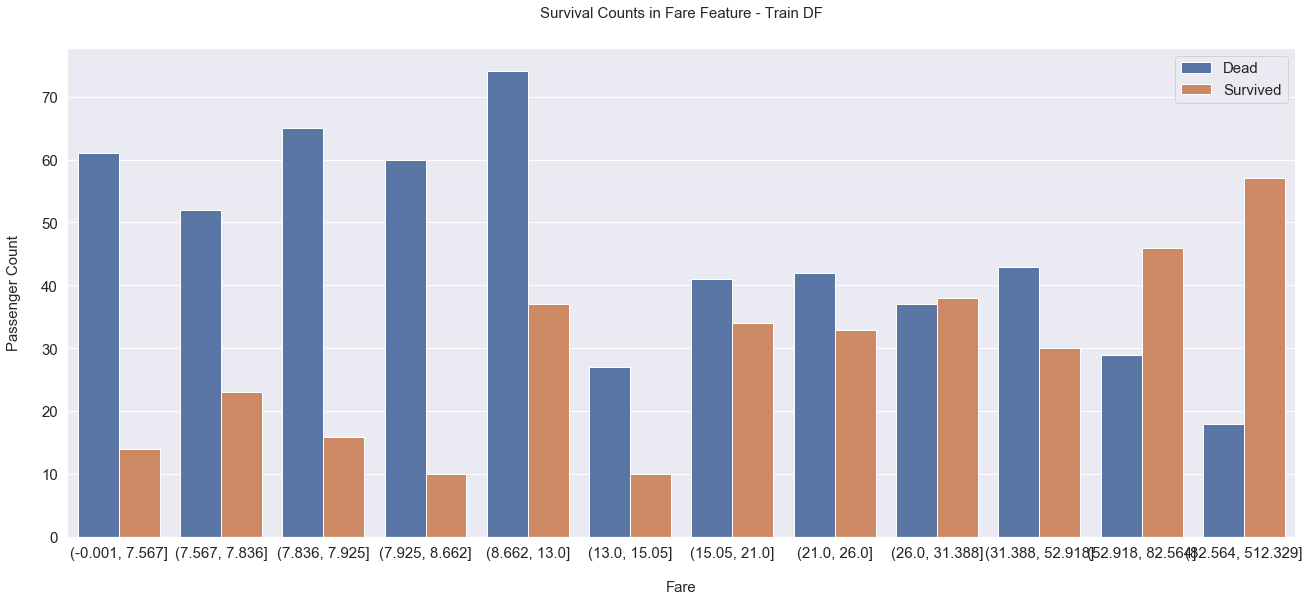

In [1173]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='FareBin', hue='Survived', data=df.sort_values(by='FareBin'))

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Dead', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature - Train DF'.format('Fare'), size=15, y=1.05)

plt.show()

In [1174]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBin,FareBin_Code
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(31.388, 52.918]",9
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(26.0, 31.388]",8
2,3,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,"(82.564, 512.329]",11
3,4,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,"(82.564, 512.329]",11
4,5,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,"(21.0, 26.0]",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,1302,1,1,"Barber, Miss. Ellen 'Nellie'",female,26.0,0,0,19877,78.8500,NaN,S,"(52.918, 82.564]",10
893,1306,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,"(82.564, 512.329]",11
894,1307,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,"(52.918, 82.564]",10
895,1308,0,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,"(52.918, 82.564]",10


In [1175]:
df.drop(columns=['Fare','FareBin'], inplace= True)

### Train Cabin

In [1176]:
# More than 76% of the values in Cabin are missing. 
# Since it is impossible to replace so many missing values without introducing errors, we remove the feature named 'Cabin'.
print(df.isnull().sum())
print("\nFraction of values that are missing in the 'Cabin' feature : ", (df.Cabin.isnull().sum()/df.shape[0]));

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             173
SibSp             0
Parch             0
Ticket            0
Cabin           685
Embarked          2
FareBin_Code      0
dtype: int64

Fraction of values that are missing in the 'Cabin' feature :  0.7636566332218506


In [1177]:
# Drop Cabin column
df.drop(columns=['Cabin'], inplace= True);
df.head();

### Train Title (Name)

Different titles found on the dataset:
15 : ['Capt', 'Col', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'the Countess']

Title column values. Males and females are the same that for the "Sex" column:
Mr        524
Miss      178
Mrs       153
Master     42
Name: Title, dtype: int64


PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             173
SibSp             0
Parch             0
Ticket            0
Embarked          2
FareBin_Code      0
Title             0
dtype: int64

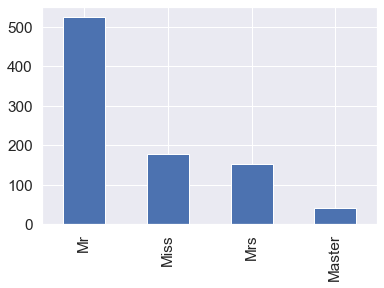

In [1178]:
# Extract Title from Name column and assign them to Title column
def get_Train_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

titles = sorted(set([x for x in df.Name.map(lambda x: get_Train_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print();

def replace_Train_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
df['Title'] = df['Name'].map(lambda x: get_Train_title(x));
df['Title'] = df.apply(replace_Train_titles, axis=1)
print('Title column values. Males and females are the same that for the "Sex" column:')
print(df.Title.value_counts())

df.Title.value_counts().plot(kind='bar')
df.drop(columns=['Name'], inplace = True);
df.isnull().sum()

In [1179]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,FareBin_Code,Title
0,1,1,1,female,47.0,1,1,11751,S,9,Mrs
1,2,1,1,male,26.0,0,0,111369,C,8,Mr
2,3,1,1,female,42.0,0,0,PC 17757,C,11,Miss
3,4,1,1,female,29.0,0,0,PC 17483,S,11,Miss
4,5,0,1,male,25.0,0,0,13905,C,7,Mr


### Train Age

Age feature has a normal distribution with some spikes and bumps and 10 quantile based bins are used for Age. The first bin has the highest survival rate and 6th bin has the lowest survival rate. Those were the biggest spikes in the distribution. Smaller Bins (<10) will not be able to capture the information (the fact that Infants will have a higher survival rate) and Larger Bins will result in overfitting as it will match too much to the train data.

In [1180]:
#  deal with age median : take according to their title
unique_titles = df['Title'].unique();
for title in unique_titles:
        impute_age = df.groupby('Title')['Age'].median()[str(title)]
        df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = impute_age

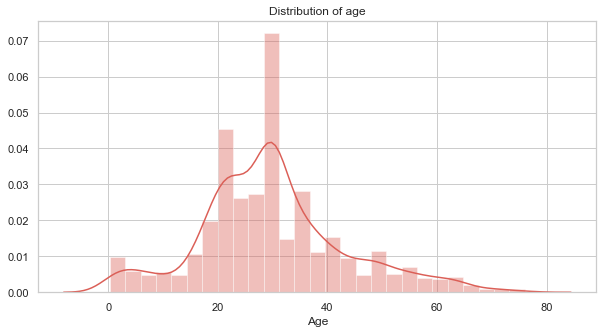

In [1181]:
# visualise age distribution after filling null values in Age column
plt.figure(figsize=(10,5));
sns.set(style="whitegrid", palette='hls',color_codes= True);
sns.distplot(df['Age']);
plt.title('Distribution of age');
plt.show()

#### Binning for Train  Age column
 

In [1182]:
# Binning the Age column into 9 levels
from sklearn.preprocessing import LabelEncoder
df['AgeBin'] = pd.qcut(df['Age'], 10, duplicates= 'drop');

# df['AgeBin'] = df['AgeBin'].astype(str);

label = LabelEncoder()
df['AgeBin_Code'] = label.fit_transform(df['AgeBin'])
df['AgeBin_Code'].unique()

array([7, 3, 4, 1, 8, 2, 5, 0, 6])

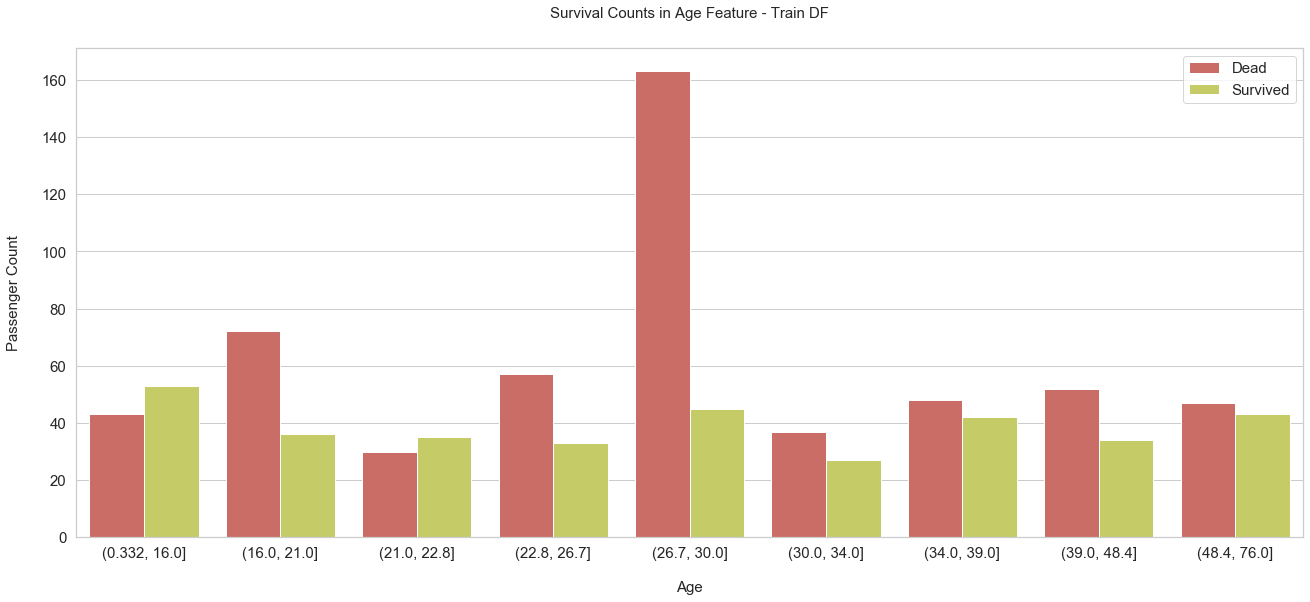

In [1183]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='AgeBin', hue='Survived', data=df.sort_values(by='AgeBin'))

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Dead', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature - Train DF'.format('Age'), size=15, y=1.05)

plt.show()

In [1184]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,FareBin_Code,Title,AgeBin,AgeBin_Code
0,1,1,1,female,47.0,1,1,11751,S,9,Mrs,"(39.0, 48.4]",7
1,2,1,1,male,26.0,0,0,111369,C,8,Mr,"(22.8, 26.7]",3
2,3,1,1,female,42.0,0,0,PC 17757,C,11,Miss,"(39.0, 48.4]",7


In [1185]:
# Drop Age, AgeBin columns
df.drop(columns=['Age','AgeBin'], inplace = True);

In [1186]:
print(df.isnull().sum());
df.head();


PassengerId     0
Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Ticket          0
Embarked        2
FareBin_Code    0
Title           0
AgeBin_Code     0
dtype: int64


### Train Embarked

Most popular type :  S


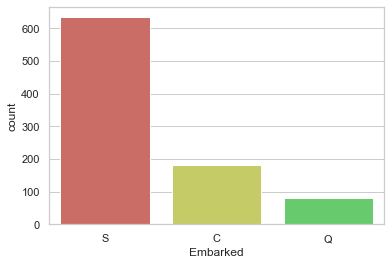

In [1187]:
# Replace Embarked missing values with the most popular one : S
replace_value_embarked = df.Embarked.value_counts(ascending= False).index[0];
print('Most popular type : ', df.Embarked.value_counts(ascending= False).index[0]);
sns.countplot(x='Embarked',data=df)

In [1188]:
df.Embarked.fillna(replace_value_embarked, inplace = True)
print(df.isnull().sum());

PassengerId     0
Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Ticket          0
Embarked        0
FareBin_Code    0
Title           0
AgeBin_Code     0
dtype: int64


### Train Fam (SibSp + Parch)

In [1189]:
# merge Sibsp and Parch into one column and drop the other two
df['Fam'] = df['SibSp'] + df['Parch'];
df.drop(columns=['SibSp','Parch'], inplace= True);

In [1190]:
df.head(10);

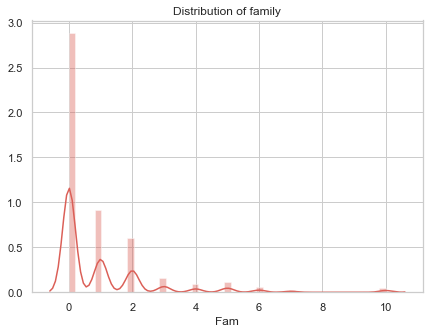

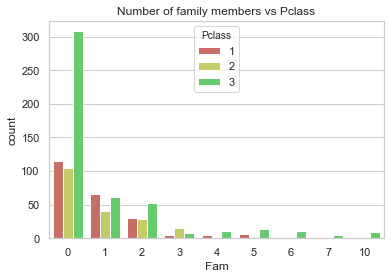

In [1191]:
# Visualise the distribution of family 
plt.figure(figsize=(7,5));
sns.distplot(df['Fam']);
plt.title('Distribution of family');
plt.show();

# Visualise the number of family members brought by different Pclasses
# plt.figure(figsize=(10,5));
sns.countplot(x='Fam',data=df, hue='Pclass');
plt.title('Number of family members vs Pclass');
plt.show()

#### Conclusion:
1. Most people travel alone.
2. The highest number of family members travelled together was 10.
3. Maximum number of people travelling alone were from 3rd Class.
4. No one from 1st Class or 2nd Class travelled with >5 family members.

### Train PassengerId, Ticket

In [1192]:
# remove PassengerId and Ticket columns since they are not really important
df.drop(columns=['PassengerId','Ticket'],inplace=True);

In [1193]:
df.head()

,Survived,Pclass,Sex,Embarked,FareBin_Code,Title,AgeBin_Code,Fam
0,1,1,female,S,9,Mrs,7,2
1,1,1,male,C,8,Mr,3,0
2,1,1,female,C,11,Miss,7,0
3,1,1,female,S,11,Miss,4,0
4,0,1,male,C,7,Mr,3,0


In [1194]:
df[df.Title=='Master']


,Survived,Pclass,Sex,Embarked,FareBin_Code,Title,AgeBin_Code,Fam
25,1,1,male,S,11,Master,0,3
52,1,1,male,S,10,Master,0,2
157,1,1,male,C,11,Master,0,4
176,1,1,male,C,11,Master,0,2
226,1,2,male,S,9,Master,0,3
242,1,2,male,S,8,Master,0,2
260,1,2,male,S,9,Master,0,2
269,1,2,male,S,9,Master,0,2
291,1,2,male,S,5,Master,0,2
329,1,2,male,C,9,Master,0,2


### Train Pclass

In [1195]:
# Remain unchanged for Pclass column

### get_dummies

In [1196]:
# Convert categorical variable into dummy/indicator variables
encd_col = ['Sex','Embarked','Title'];
ohe_features = pd.get_dummies(data=df.loc[:, encd_col]);
df.drop(columns=encd_col,inplace=True);
df = df.join(ohe_features)
df.head(10)

,Survived,Pclass,FareBin_Code,AgeBin_Code,Fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,1,9,7,2,1,0,0,0,1,0,0,0,1
1,1,1,8,3,0,0,1,1,0,0,0,0,1,0
2,1,1,11,7,0,1,0,1,0,0,0,1,0,0
3,1,1,11,4,0,1,0,0,0,1,0,1,0,0
4,0,1,7,3,0,0,1,1,0,0,0,0,1,0
5,1,1,11,1,1,1,0,1,0,0,0,0,0,1
6,0,1,9,7,0,0,1,0,0,1,0,0,1,0
7,1,1,8,7,0,0,1,1,0,0,0,0,1,0
8,1,1,8,8,0,1,0,0,0,1,0,1,0,0
9,1,1,11,7,0,1,0,1,0,0,0,1,0,0


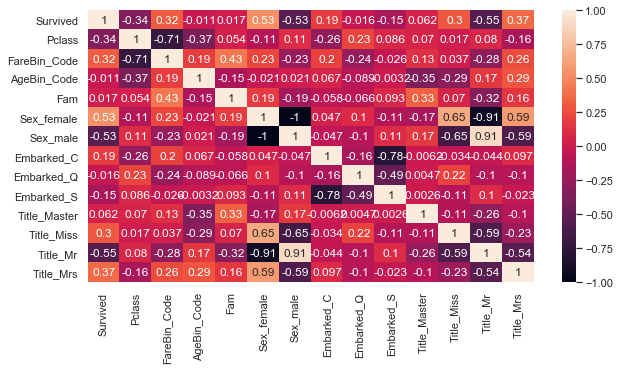

In [1197]:
#  See the relationship of the columns after feature engineering.
plt.figure(figsize=(10,5));
sns.heatmap(df.corr(), annot= True);
plt.show()

## Data prepartion for test set 


In [1198]:
dftest.head();

### Test Ticket

In [1199]:
# drop Ticket
dftest.drop(columns=['Ticket'], inplace = True);
print(dftest.isnull().sum());

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             90
SibSp            0
Parch            0
Fare             1
Cabin          329
Embarked         0
dtype: int64


### Test  Fare

In [1200]:
# Fill the null values in Fare column with the mean of overall Fare
dftest.fillna(np.mean(dftest.Fare), inplace=True);
print(dftest.isnull().sum());

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [1201]:
from sklearn.preprocessing import LabelEncoder
dftest['FareBin'] = pd.qcut(dftest['Fare'], 12, duplicates= 'drop');

# df['AgeBin'] = df['AgeBin'].astype(str);

label = LabelEncoder()
dftest['FareBin_Code'] = label.fit_transform(dftest['FareBin'])
dftest['FareBin_Code'].unique()

array([11,  8,  9, 10,  0,  7,  4,  5,  6,  1,  3,  2])

In [1202]:
dftest.drop(columns=['FareBin','Fare'],inplace= True)

In [1203]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,FareBin_Code
0,6,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,B49,C,11
1,8,1,"Bissette, Miss. Amelia",female,35.0,0,0,C99,S,11
2,9,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,C52,S,8
3,12,1,"Bonnell, Miss. Caroline",female,30.0,0,0,C7,S,11
4,14,1,"Borebank, Mr. John James",male,42.0,0,0,D22,S,8


### Test Title (Name)

Different titles found on the dataset:
13 : ['Col', 'Don', 'Dona', 'Dr', 'Major', 'Master', 'Miss', 'Mlle', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir']

Title column values. Males and females are the same that for the "Sex" column:
Mr        258
Miss       86
Mrs        49
Master     19
Name: Title, dtype: int64


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,FareBin_Code,Title
0,6,1,male,25.0,1,0,B49,C,11,Mr
1,8,1,female,35.0,0,0,C99,S,11,Miss
2,9,1,male,28.0,0,0,C52,S,8,Mr
3,12,1,female,30.0,0,0,C7,S,11,Miss
4,14,1,male,42.0,0,0,D22,S,8,Mr


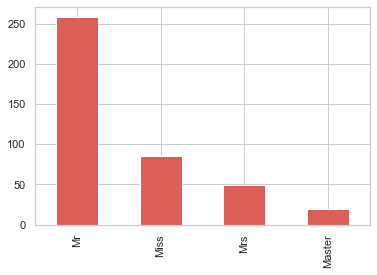

In [1204]:
# Extract Title from Name column and assign them to Title column
def get_Test_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

titles = sorted(set([x for x in dftest.Name.map(lambda x: get_Test_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print();

def replace_Test_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir','Don']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
dftest['Title'] = dftest['Name'].map(lambda x: get_Test_title(x));
dftest['Title'] = dftest.apply(replace_Test_titles, axis=1)
print('Title column values. Males and females are the same that for the "Sex" column:')
print(dftest.Title.value_counts())

dftest.Title.value_counts().plot(kind='bar');
dftest.drop(columns=['Name'], inplace= True);
dftest.head()

### Test Age

In [1205]:

unique_titles = dftest['Title'].unique();

for title in unique_titles:
        impute_age = dftest.groupby('Title')['Age'].median()[str(title)]
        dftest.loc[(dftest['Age'].isnull()) & (dftest['Title'] == title), 'Age'] = impute_age

In [1206]:
# Binning the Age column into 9 levels
# Drop Age and AgeBin columns
from sklearn.preprocessing import LabelEncoder
dftest['AgeBin'] = pd.qcut(dftest['Age'], 10, duplicates='drop');

label = LabelEncoder();
dftest['AgeBin_Code'] = label.fit_transform(dftest['AgeBin']);

print(dftest['AgeBin_Code'].unique());

dftest.drop(columns=['Age','AgeBin'], inplace = True);

[3 5 4 6 0 7 2 1]


In [1207]:
print(dftest.isnull().sum());
dftest.head()

PassengerId     0
Pclass          0
Sex             0
SibSp           0
Parch           0
Cabin           0
Embarked        0
FareBin_Code    0
Title           0
AgeBin_Code     0
dtype: int64


,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,FareBin_Code,Title,AgeBin_Code
0,6,1,male,1,0,B49,C,11,Mr,3
1,8,1,female,0,0,C99,S,11,Miss,5
2,9,1,male,0,0,C52,S,8,Mr,3
3,12,1,female,0,0,C7,S,11,Miss,4
4,14,1,male,0,0,D22,S,8,Mr,6


### Test Pclass

In [1208]:
# Remain the same for Pclass

### Test Cabin

In [1209]:
# Drop Cabin
dftest.drop(columns=['Cabin'], inplace= True);

### Test Fam (SibSp + Parch)

In [1210]:
# merge Sibsp and Parch into one column and drop the other two
dftest['Fam'] = dftest['SibSp'] + dftest['Parch']
dftest.drop(columns=['SibSp','Parch'],inplace=True)
dftest.head();

### Test Embarked

Most popular type :  S


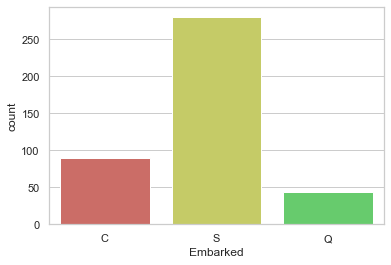

In [1211]:
# Replace Embarked missing values with the most popular one : S
replace_value_embarked = dftest.Embarked.value_counts(ascending= False).index[0];
print('Most popular type : ', dftest.Embarked.value_counts(ascending= False).index[0]);
sns.countplot(x='Embarked',data=dftest)


In [1212]:
dftest.Embarked.fillna(replace_value_embarked, inplace = True)
dftest.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Embarked        0
FareBin_Code    0
Title           0
AgeBin_Code     0
Fam             0
dtype: int64

In [1213]:
dftest.head()

,PassengerId,Pclass,Sex,Embarked,FareBin_Code,Title,AgeBin_Code,Fam
0,6,1,male,C,11,Mr,3,1
1,8,1,female,S,11,Miss,5,0
2,9,1,male,S,8,Mr,3,0
3,12,1,female,S,11,Miss,4,0
4,14,1,male,S,8,Mr,6,0


### Test PassengerId

In [1214]:
#  drop PassengerId
dftest1 = dftest.drop(columns=['PassengerId']);

In [1215]:
dftest1

,Pclass,Sex,Embarked,FareBin_Code,Title,AgeBin_Code,Fam
0,1,male,C,11,Mr,3,1
1,1,female,S,11,Miss,5,0
2,1,male,S,8,Mr,3,0
3,1,female,S,11,Miss,4,0
4,1,male,S,8,Mr,6,0
...,...,...,...,...,...,...,...
407,1,male,S,8,Mr,7,0
408,1,male,C,11,Mr,7,1
409,1,male,S,9,Mr,7,0
410,1,male,S,7,Mr,4,0


### get_dummies

In [1216]:
# Convert categorical variable into dummy/indicator variables
encd_col1 = ['Sex','Embarked','Title']
ohe_features2 = pd.get_dummies(data=dftest1.loc[:,encd_col1]);
dftest1.drop(columns=encd_col1,inplace=True)
dftest1 = dftest1.join(ohe_features2)
dftest1.head(10)

,Pclass,FareBin_Code,AgeBin_Code,Fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,11,3,1,0,1,1,0,0,0,0,1,0
1,1,11,5,0,1,0,0,0,1,0,1,0,0
2,1,8,3,0,0,1,0,0,1,0,0,1,0
3,1,11,4,0,1,0,0,0,1,0,1,0,0
4,1,8,6,0,0,1,0,0,1,0,0,1,0
5,1,8,6,0,0,1,0,0,1,0,0,1,0
6,1,9,4,0,0,1,0,0,1,0,0,1,0
7,1,11,5,1,0,1,1,0,0,0,0,1,0
8,1,11,0,3,1,0,0,0,1,0,1,0,0
9,1,11,5,3,1,0,0,0,1,0,0,0,1


## Final Check for the existance of missing data in both datasets

In [1217]:
df.head()

,Survived,Pclass,FareBin_Code,AgeBin_Code,Fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,1,9,7,2,1,0,0,0,1,0,0,0,1
1,1,1,8,3,0,0,1,1,0,0,0,0,1,0
2,1,1,11,7,0,1,0,1,0,0,0,1,0,0
3,1,1,11,4,0,1,0,0,0,1,0,1,0,0
4,0,1,7,3,0,0,1,1,0,0,0,0,1,0


In [1218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Survived      897 non-null    int64
 1   Pclass        897 non-null    int64
 2   FareBin_Code  897 non-null    int32
 3   AgeBin_Code   897 non-null    int32
 4   Fam           897 non-null    int64
 5   Sex_female    897 non-null    uint8
 6   Sex_male      897 non-null    uint8
 7   Embarked_C    897 non-null    uint8
 8   Embarked_Q    897 non-null    uint8
 9   Embarked_S    897 non-null    uint8
 10  Title_Master  897 non-null    uint8
 11  Title_Miss    897 non-null    uint8
 12  Title_Mr      897 non-null    uint8
 13  Title_Mrs     897 non-null    uint8
dtypes: int32(2), int64(3), uint8(9)
memory usage: 36.0 KB


In [1219]:
dftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pclass        412 non-null    int64
 1   FareBin_Code  412 non-null    int32
 2   AgeBin_Code   412 non-null    int32
 3   Fam           412 non-null    int64
 4   Sex_female    412 non-null    uint8
 5   Sex_male      412 non-null    uint8
 6   Embarked_C    412 non-null    uint8
 7   Embarked_Q    412 non-null    uint8
 8   Embarked_S    412 non-null    uint8
 9   Title_Master  412 non-null    uint8
 10  Title_Miss    412 non-null    uint8
 11  Title_Mr      412 non-null    uint8
 12  Title_Mrs     412 non-null    uint8
dtypes: int32(2), int64(2), uint8(9)
memory usage: 13.4 KB


# Train Model

## Split Data into Train and Test Sets

In [1220]:
#  Split the Train set into 8/2
from sklearn.model_selection import train_test_split
X = df.drop(["Survived"], axis=1).values
y = df['Survived'].values;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1);
print("Train : {},{}".format(X_train.shape,y_train.shape));
print("Test : {},{}".format(X_test.shape,y_test.shape));

Train : (717, 13),(717,)
Test : (180, 13),(180,)


## Train Model with Algorithm: 
- How did you select which learning algorithms to use?
  - Since I want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Pclass...). I are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:
    - Logistic Regression
    - KNN or k-Nearest Neighbors
    - Support Vector Machines
    - Naive Bayes classifier
    - Decision Tree
    - Random Forrest
    - Perceptron

## Import Model

In [1221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

In [1222]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print('Score for SVC : {}'.format(acc_svc));

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print('Score for KNN : {}'.format(acc_knn));

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print('Score for Gaussian : {}'.format(acc_gaussian));

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print('Score for Perceptron : {}'.format(acc_perceptron));

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_decision = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('Score for DecisionTreeClassifier : {}'.format(acc_decision_tree));

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('Score for RandomForestClassifier : {}'.format(acc_random_forest));

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Score for LogisticRegression : {}'.format(acc_log));

Score for SVC : 81.17
Score for KNN : 86.19
Score for Gaussian : 80.06
Score for Perceptron : 79.08
Score for DecisionTreeClassifier : 92.47
Score for RandomForestClassifier : 92.47
Score for LogisticRegression : 82.29


Seems like <b>DecisionTreeClassifer</b> and <b>RandomForestClassifer</b> are the best among the models.

## Choose algorithum and tune the hyperparameters
By using GridSearchCV from model_selection of sklearn and setting up the hyperparameters, it can find the most suitable hyperparameters, giving the best score.


### Logistic Regression

Fitting 10 folds for each of 6000 candidates, totalling 60000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 3034 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 10218 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 31082 tasks      | elapsed:   44.5s
[Parallel(n_jobs=6)]: Done 59582 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 60000 out of 60000 | elapsed:  1.1min finished


Logistic Regression best score:  0.8697225228475227
Logistic Regression best params:  {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 10, 'penalty': 'l1', 'solver': 'liblinear'}
ROC AUC score =  0.8603896103896104


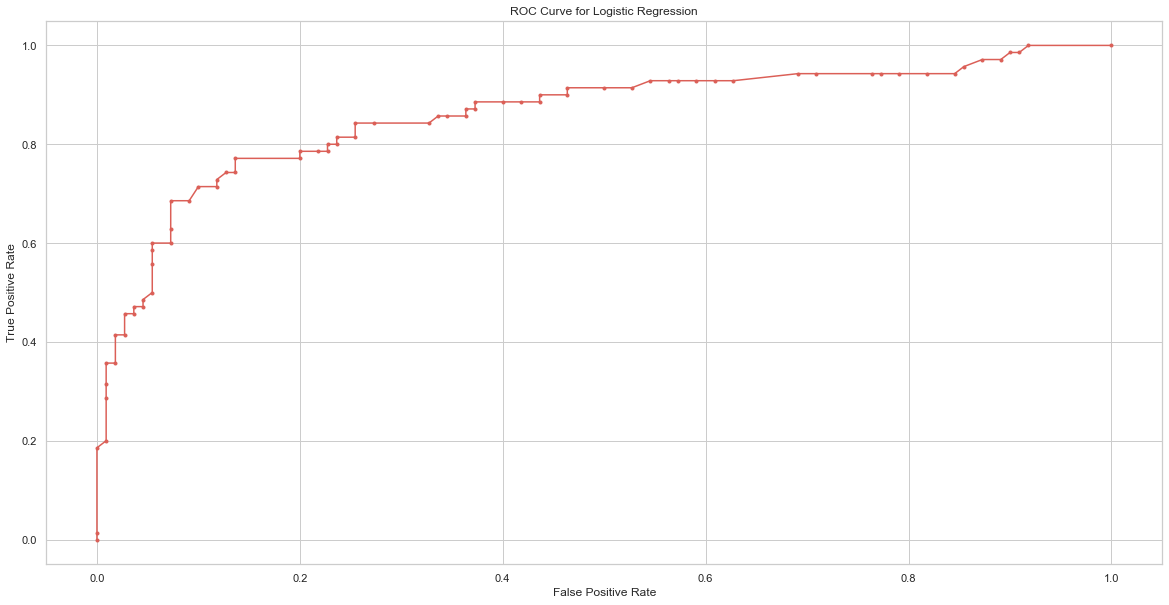

In [1224]:

# Logistic Regression

param_grid= {
    'penalty' : [ 'l1', 'l2', 'elasticnet', None ],
    'dual' : [False, True],
    'C' : [1, 5, 10, 15, 20],
    'fit_intercept' : [False, True],
    'intercept_scaling' : [1, 5, 10, 15, 20],
    'class_weight' : ['dict', 'balanced', None],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


logr_gs = GridSearchCV(estimator= LogisticRegression(), param_grid=param_grid,cv=10,verbose = 1, scoring="roc_auc",n_jobs= 6);
logr_gs.fit(X_train,y_train);
print("Logistic Regression best score: ",logr_gs.best_score_);
print("Logistic Regression best params: ", logr_gs.best_params_);

#  Defining the logistic regression
logr_best = LogisticRegression( C=logr_gs.best_params_.get('C'), class_weight=logr_gs.best_params_.get('class_weight'), 
                               dual =logr_gs.best_params_.get('dual'), penalty=logr_gs.best_params_.get('penalty'),
                               fit_intercept=logr_gs.best_params_.get('fit_intercept'),solver=logr_gs.best_params_.get('solver'),
                               intercept_scaling=logr_gs.best_params_.get('intercept_scaling'))
logr_best.fit(X_train,y_train)


# # Preds and accuracy
y_pred1 = logr_best.predict_proba(X_test)
# We are interested in the True and False Positives only.
fptp = y_pred1[:,1]  # As 2nd value tells the probability of getting a 1

# Getting the ROC-AUC score and plotting the ROC curve
logr_score = roc_auc_score(y_test,fptp)
print("ROC AUC score = ",logr_score)
lr_fp,lr_tp,_ = roc_curve(y_test,fptp)   # Returns FPR, TPR and thresholds.
plt.figure(figsize=(20,10))
plt.plot(lr_fp,lr_tp,marker='.',label="Logistic Regression ROC Curve")
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for Logistic Regression')
plt.show();

### KNeighbors Classifier

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 960 out of 960 | elapsed:    0.8s finished


K-Nearest Neighbors best score:  0.8503224730695662
K-Nearest Neighbors best params:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
ROC AUC score =  0.8454545454545455


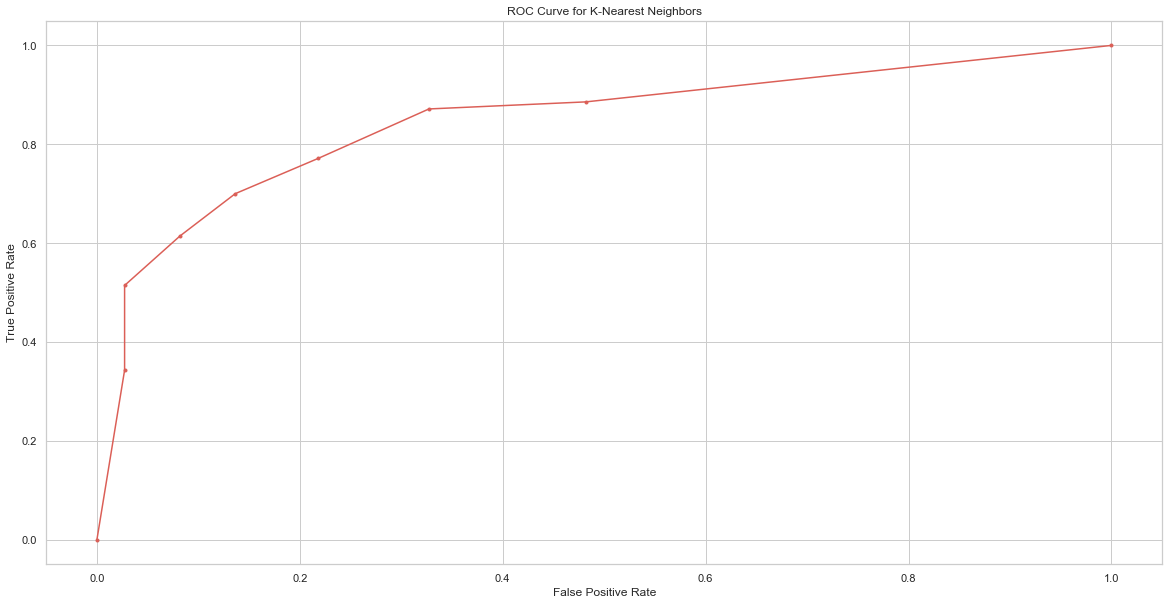

In [1225]:
knn = KNeighborsClassifier()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Hyperparameter tuning
param_grid = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan','minkowski'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
}
knn_gs = GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,n_jobs= 6, verbose = 1, scoring="roc_auc")
knn_gs.fit(X_train_scaled,y_train)
print("K-Nearest Neighbors best score: ", knn_gs.best_score_);
print("K-Nearest Neighbors best params: ", knn_gs.best_params_);


# Defining the knn classifier
knn_best = KNeighborsClassifier(n_neighbors=knn_gs.best_params_.get('n_neighbors'),weights=knn_gs.best_params_.get('weights'),algorithm=knn_gs.best_params_.get('algorithm'),metric=knn_gs.best_params_.get('metric'))
knn_best.fit(X_train,y_train)

# ROC-AUC score
y_pred2 = knn_best.predict_proba(X_test)
# We are interested in the True and False Positives only.
fptp2 = y_pred2[:,1]  # As 2nd value tells the probability of getting a 1

# Getting the ROC-AUC score and plotting the ROC curve
knn_score = roc_auc_score(y_test,fptp2)
print("ROC AUC score = ",knn_score)
lr_fp2,lr_tp2,_ = roc_curve(y_test,fptp2)   # Returns FPR, TPR and thresholds.
plt.figure(figsize=(20,10))
plt.plot(lr_fp2,lr_tp2,marker='.',label="KNN ROC Curve")
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for K-Nearest Neighbors');
plt.show()

### Randomforest Classifier

Fitting 8 folds for each of 96 candidates, totalling 768 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 768 out of 768 | elapsed:  1.3min finished


RandomForest Classifier best score:  0.8663528845881787
RandomForest Classifier best params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
ROC AUC score =  0.8117532467532467


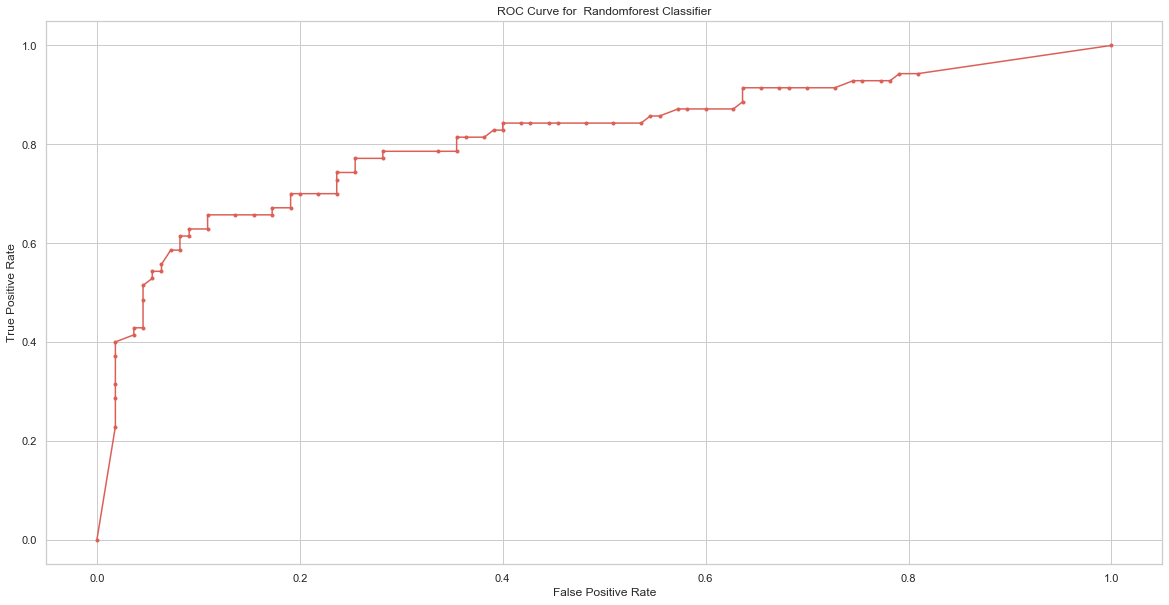

In [1226]:
#  Tunning the hyperparamters of RandomForestClassifier
rf = RandomForestClassifier()

# Hyperparameter tuning
param_grid = {
              "max_depth": [None],
              "max_features": [3,"sqrt", "log2"],
              "min_samples_split": [2, 4],
              "min_samples_leaf": [5, 7],
              "bootstrap": [False, True],
              "n_estimators" :[200, 500],
              "criterion": ["gini", "entropy"]
}

rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs= 6, cv=8, verbose = 1, scoring="roc_auc")
rf_gs.fit(X_train,y_train)
print("RandomForest Classifier best score: ", rf_gs.best_score_);
print("RandomForest Classifier best params: ", rf_gs.best_params_);

# Defining the rf classifier
rf_best = RandomForestClassifier(n_estimators=rf_gs.best_params_.get('n_estimators'),
                                 criterion=rf_gs.best_params_.get('criterion'),
                                 max_depth=rf_gs.best_params_.get('max_depth'),
                                 max_features=rf_gs.best_params_.get('max_features'))
rf_best.fit(X_train,y_train)

# ROC-AUC score
y_pred3 = rf_best.predict_proba(X_test)
# We are interested in the True and False Positives only.
fptp3 = y_pred3[:,1]  # As 2nd value tells the probability of getting a 1

# Getting the ROC-AUC score and plotting the ROC curve
rf_score = roc_auc_score(y_test,fptp3);
print("ROC AUC score = ",rf_score);
lr_fp3,lr_tp3,_ = roc_curve(y_test,fptp3);   # Returns FPR, TPR and thresholds.
plt.figure(figsize=(20,10));
plt.plot(lr_fp3,lr_tp3,marker='.',label="RF ROC Curve;")
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for  Randomforest Classifier');
plt.show();

### GradientBoosting Classifier

In [1228]:
clr =GradientBoostingClassifier(learning_rate=0.025);
clr.fit(X_train,y_train)
clr

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.025, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Score and Evaluate Model
**How do you evaluate the quality of your system?**

- By using the accuracy_score, roc_auc_score, roc_curve from sklearn.metrics to find the score and area under curve of the trained model.


**Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)**

- By using Randomforest Classifier model and the feature_importances_ function, i can get the results for importance of all features. Looking at the graph, FareBin_Code is the most important feature, followed by AgeBin_Code, Title_Mr, Pclass and Fam... They all have importance more than 0.10.

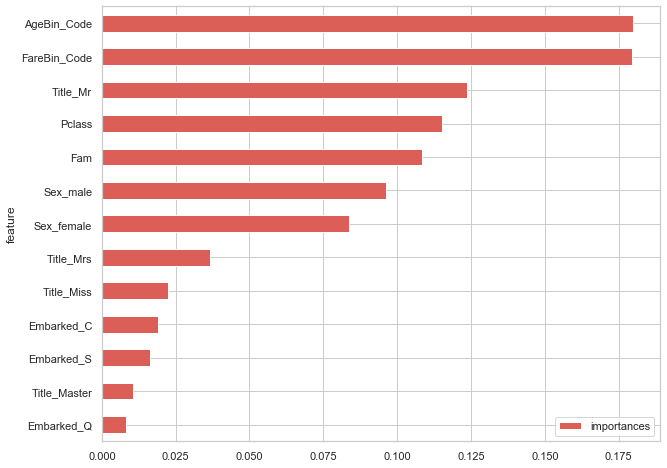

In [1229]:
features_in_df = df.drop(["Survived"], axis=1);
features = pd.DataFrame();
features['feature'] = features_in_df.columns;
features['importances'] = random_forest.feature_importances_;
features.sort_values(by=['importances'], ascending=True,  inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10, 8),);
plt.show();

- Bar chart above shows the importances of different features.
   - FareBin_Code is the most important feature among all
   - Embarked_Q is the least important feature among all.

In [1230]:
# y_hat= knn_best.predict(X_test)
# y_hat= logr_best.predict(X_test)
y_hat= rf_best.predict(X_test)
# y_hat= clr.predict(X_test)

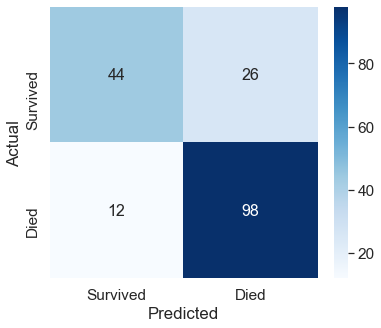

In [1231]:
from sklearn.metrics import confusion_matrix

# evaluate model for test set

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [1232]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.89%


# Submitting to Kaggle
##  Prediction with Logistics Regression Trained Model

**How well does your system compare to a stupid baseline?**
- Stupid baseline only predicts that everyone on titanic died with score of 0.66666, my system can predict the accuracy of survival rate of the actual titanic data with score of 0.82926.


In [1233]:
Xp = dftest1.values
Xp

array([[ 1, 11,  3, ...,  0,  1,  0],
       [ 1, 11,  5, ...,  1,  0,  0],
       [ 1,  8,  3, ...,  0,  1,  0],
       ...,
       [ 1,  9,  7, ...,  0,  1,  0],
       [ 1,  7,  4, ...,  0,  1,  0],
       [ 1, 11,  2, ...,  0,  1,  0]], dtype=int64)

In [1234]:
yp_hat = rf_best.predict(Xp)
# yp_hat = knn_best.predict(Xp)
# yp_hat = logr_best.predict(Xp)
# yp_hat = clr.predict(Xp)

In [1235]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = dftest[["PassengerId"]];
dfout["Survived"] = yp_hat
dfout[:5]

,PassengerId,Survived
0,6,1
1,8,1
2,9,1
3,12,1
4,14,1


In [1236]:
# dfout.to_csv("predict0.csv",index=False);

# Conclusions

**How do you represent your data as features?**

- Select the columns which will be a factor of the result. 


**Did you process the features in any way?**
- Perform binning on ‘Fare’ column into 12 levels and assign them to 'Fare_Code' column.
- Extract Title from 'Name' column. 
- Combine 'SibSp' and 'Parch' columns into 'Fam' column.    
- Fill null values in 'Age' with the median of the age group by titles and bin them into 9 levels
- Fill nul values in 'Embarked' with the mode of 'Embarked' column.


**Did you bring in any additional sources of data?**

- Background research of Titanic    
- references on the different models and algorithums.
    
**Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix**

- The errors could be caused by overfitting or underfitting, but they are unavoidable, since we use train_test_split function to split our Train data into train set and test set. There are some variability of how the data is splitted.

**In conclusion, the top 3 models giving high scores are RandomForestClassifer, KNeighborsClassifier and LogisticRegression. I choose to use RandomForest Classifier after tunning its hyperparameters, since it gives me the highest score for train set.**

**The system predicted 98 people correctly died and 44 people correctly survived, and 12 people falsely predicted as survived and 26 people fasely predicted as died.**



# Reference
- Kaggle.com. 2020. Titanic_Challenge. [online] Available at: <https://www.kaggle.com/balaka18/titanic-challenge> [Accessed 25 May 2020].

- Kaggle.com. 2019. Titanic Data Science Solutions. [online] Available at: <https://www.kaggle.com/startupsci/titanic-data-science-solutions> [Accessed 25 May 2020].


- GitHub. Oct 29, 2017. Minsuk-Heo/Kaggle-Titanic. [online] Available at: <https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb> [Accessed 29 May 2020].

- History.com. 2020. [online] Available at: <https://www.history.com/topics/early-20th-century-us/titanic> [Accessed 1 June 2020].